In [125]:
file_path = "./MLHomework_Toxicity/train.csv"
import pandas as pd
file = pd.read_csv(file_path)
df = pd.DataFrame(file)

In [126]:
df

,id,comment_text,target
0,5413656,???...You trying to hard...#MAGA,0.000000
1,267023,I am not speaking for myself. I pay for my own...,0.166667
2,5092377,"bank of hawaii, first hawaiian bank, most land...",0.000000
3,723958,"""Trump on Friday night vowed to seek approval ...",0.000000
4,5571767,"Right...so if the headlines instead read ""Clin...",0.000000
...,...,...,...
1777795,6252077,Your flip-flops are in the mail Billy!,0.000000
1777796,5358958,"When I taught C language computer programming,...",0.000000
1777797,5287987,Trudeau justified by lying & saying they were ...,0.200000
1777798,5129035,So i really want you to think about what you a...,0.000000


In [152]:
test_index = np.random.choice(range(df.shape[0]), int(df.shape[0] * 0.1), replace=False)

In [158]:
train_index = [i for i in range(df.shape[0]) if i not in test_index]

In [156]:
df_test = df.loc[sorted(test_index)]

In [157]:
df_test

,id,comment_text,target
18,683488,"...And, while with silent lifting mind I've tr...",0.000000
36,5247774,They can't admit to being duped because that w...,0.300000
44,247863,The state ODEQ and the Health Authority cannot...,0.000000
59,384852,When a kid in Portland sees the drug dealers t...,0.000000
71,928120,I continue to be shocked that one person in a ...,0.000000
...,...,...,...
1777756,989779,Good job!,0.000000
1777763,675743,One animal control officer for a city the size...,0.000000
1777768,5126768,Fire Munoz. The pathetic United CEO originally...,0.166667
1777779,5694937,which one is this?\nuday or qusay?,0.000000


In [160]:
df_test.to_csv("test.csv")

In [161]:
df_train.to_csv("train.csv")

In [159]:
df_train = df.loc[sorted(train_index)]
df_train

,id,comment_text,target
0,5413656,???...You trying to hard...#MAGA,0.000000
1,267023,I am not speaking for myself. I pay for my own...,0.166667
2,5092377,"bank of hawaii, first hawaiian bank, most land...",0.000000
3,723958,"""Trump on Friday night vowed to seek approval ...",0.000000
4,5571767,"Right...so if the headlines instead read ""Clin...",0.000000
...,...,...,...
1777795,6252077,Your flip-flops are in the mail Billy!,0.000000
1777796,5358958,"When I taught C language computer programming,...",0.000000
1777797,5287987,Trudeau justified by lying & saying they were ...,0.200000
1777798,5129035,So i really want you to think about what you a...,0.000000


In [70]:
comment_text = df['comment_text']

In [62]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [124]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm
lengths = [len(tokenizer.encode(_)) for _ in tqdm(comment_text)]

100%|██████████| 1777800/1777800 [23:28<00:00, 1262.60it/s]


In [98]:
max(lengths), min(lengths)

(432, 1)

In [99]:
# the text length
x = [i+1 for i in range(max(lengths))]
y = [lengths.count(i) for i in x]

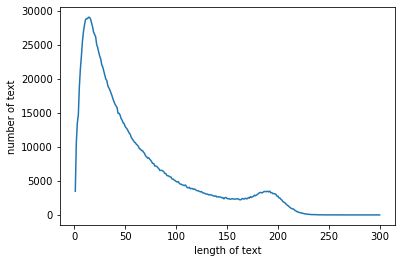

In [113]:
import matplotlib.pyplot as plt
plt.plot(x[:300],y[:300])
plt.xlabel("length of text")
plt.ylabel("number of text")
plt.savefig("trainset-PDF.png")

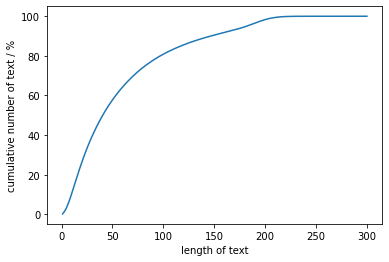

In [111]:
plt.plot(x[:300],np.cumsum(y)[:300]/sum(y)*100)
plt.xlabel("length of text")
plt.ylabel("cumulative number of text / %")
plt.savefig("trainset-CDF.png")

In [105]:
np.cumsum(y)[200] / sum(y)

0.9844926313421082

In [87]:
[_ for _ in tqdm(comment_text[:100000]) if len(sent_tokenize(_))<=1]


100%|██████████| 100000/100000 [00:07<00:00, 12545.71it/s][A


['Right...so if the headlines instead read "Clinton met with Russian officials for incriminating information on Trump" you wouldn\'t think that was news either?',
 '>> ... reason and compassion ..\n\nDo you ever take a break ...',
 'Trudeau, Trump, Kim....Curly Larry and Moe.',
 "it's always a hit mob no matter what level of leftist you deal with...it's called bullying",
 'You elected to be Dick - not Jamie',
 "...and don't forget, he has small hands to begin with...",
 'So in your little world, two wrongs make a right ?',
 'Looks like he was right after all.',
 'Trevor who?',
 'Why is yoga practice newsworthy?',
 'Not all families, not even most families, a very few families, fortunately.',
 "I'll fight her",
 "When a kid in Portland sees the drug dealers there driving the BMW's and the kids in school struggling to get between home and school alive because they aren't in a gang, your emphasis on macro-economics, international relations, health care and educational opportunity is ignor

  7%|▋         | 131880/1777800 [00:22<02:10, 12645.60it/s]

In [88]:
sent_tokenize('Encourage people to make better personal choices')

['Encourage people to make better personal choices']

In [ ]:
import pandas as pd
import numpy as np
import torch
import os
MAX_LENGTH = 200

def create_dataloader(root="./MLHomework_Toxicity", usage="train", tokenizer=None, batch_size=32):
    if tokenizer is None:
        from transformers import BertTokenizer
        tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    file_path = f"{root}/{usage}.csv"
    file = pd.read_csv(file_path)
    df = pd.DataFrame(file)
    dataset = torch.utils.data.TensorDataset(
        torch.tensor([tokenizer.encode(text, truncation=True, max_length=MAX_LENGTH, padding="max_length")
                      for text in tqdm(df["comment_text"])]).long(),
        torch.tensor([_ for _ in df["target"]] if usage=="train" else [np.nan for i in range(df.shape[0])]),
    )
    dataloader = torch.utils.data.DataLoader(
        dataset = dataset,
        sampler = torch.utils.data.RandomSampler(dataset) if usage=="train" else torch.utils.data.SequentialSampler(dataset),
        batch_size = batch_size,
        drop_last = True if usage=="train" else False
    )
    return dataloader

def get_dataloader(root="./MLHomework_Toxicity", usage="train", tokenizer=None, batch_size=32, erase=False):
    dataloader_file_path = f"{root}/{usage}-{batch_size}.pt"
    if os.path.exists(dataloader_file_path) and not erase:
        dataloader = torch.load(dataloader_file_path)
    else:
        dataloader = create_dataloader(root, usage, tokenizer, batch_size)
        torch.save(dataloader, dataloader_file_path)
    return dataloader

In [117]:
df

,rating,funny,physical_disability,male,black,identity_annotator_count,christian,toxicity_annotator_count,bisexual,other_race_or_ethnicity,...,homosexual_gay_or_lesbian,muslim,other_religion,publication_id,obscene,atheist,identity_attack,intellectual_or_learning_disability,threat,disagree
0,approved,1,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,55,0.0,NaN,0.0,NaN,0.0,0
1,approved,0,NaN,NaN,NaN,0,NaN,6,NaN,NaN,...,NaN,NaN,NaN,21,0.0,NaN,0.0,NaN,0.0,0
2,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,22,0.0,NaN,0.0,NaN,0.0,0
3,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,54,0.0,NaN,0.0,NaN,0.0,1
4,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,13,0.0,NaN,0.0,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777795,approved,3,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,54,0.0,NaN,0.0,NaN,0.0,0
1777796,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,53,0.0,NaN,0.0,NaN,0.0,0
1777797,approved,0,0.0,0.0,0.0,4,0.0,10,0.0,0.0,...,0.0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0
1777798,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,21,0.0,NaN,0.0,NaN,0.0,0


In [89]:
from nltk import word_tokenize

In [90]:
word_tokenize(comment_text[0])

['?', '?', '?', '...', 'You', 'trying', 'to', 'hard', '...', '#', 'MAGA']

In [108]:
print(tokenizer.convert_ids_to_tokens(tokenizer.encode('http://www.oregonlive.com/portland/index.ssf/2016/05/threatening_family_or_naked_in.html#incart_special-report')))

['[CLS]', 'http', ':', '/', '/', 'www', '.', 'oregon', '##li', '##ve', '.', 'com', '/', 'portland', '/', 'index', '.', 'ss', '##f', '/', '2016', '/', '05', '/', 'threatening', '_', 'family', '_', 'or', '_', 'naked', '_', 'in', '.', 'html', '#', 'inca', '##rt', '_', 'special', '-', 'report', '[SEP]']


In [93]:
file_path = "./MLHomework_Toxicity/train_extra.csv"
import pandas as pd
file = pd.read_csv(file_path)
df = pd.DataFrame(file)

In [94]:
df

,rating,funny,physical_disability,male,black,identity_annotator_count,christian,toxicity_annotator_count,bisexual,other_race_or_ethnicity,...,homosexual_gay_or_lesbian,muslim,other_religion,publication_id,obscene,atheist,identity_attack,intellectual_or_learning_disability,threat,disagree
0,approved,1,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,55,0.0,NaN,0.0,NaN,0.0,0
1,approved,0,NaN,NaN,NaN,0,NaN,6,NaN,NaN,...,NaN,NaN,NaN,21,0.0,NaN,0.0,NaN,0.0,0
2,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,22,0.0,NaN,0.0,NaN,0.0,0
3,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,54,0.0,NaN,0.0,NaN,0.0,1
4,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,13,0.0,NaN,0.0,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777795,approved,3,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,54,0.0,NaN,0.0,NaN,0.0,0
1777796,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,53,0.0,NaN,0.0,NaN,0.0,0
1777797,approved,0,0.0,0.0,0.0,4,0.0,10,0.0,0.0,...,0.0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0
1777798,approved,0,NaN,NaN,NaN,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,21,0.0,NaN,0.0,NaN,0.0,0


In [95]:
df.columns

Index(['rating', 'funny', 'physical_disability', 'male', 'black',
       'identity_annotator_count', 'christian', 'toxicity_annotator_count',
       'bisexual', 'other_race_or_ethnicity', 'sad',
       'psychiatric_or_mental_illness', 'latino', 'other_sexual_orientation',
       'article_id', 'severe_toxicity', 'asian', 'white', 'other_gender',
       'female', 'hindu', 'id', 'insult', 'other_disability', 'transgender',
       'heterosexual', 'created_date', 'wow', 'jewish', 'likes',
       'sexual_explicit', 'buddhist', 'parent_id', 'homosexual_gay_or_lesbian',
       'muslim', 'other_religion', 'publication_id', 'obscene', 'atheist',
       'identity_attack', 'intellectual_or_learning_disability', 'threat',
       'disagree'],
      dtype='object')

In [41]:
valid_columns = ['rating', 'funny', 'identity_annotator_count', 
                 'toxicity_annotator_count', 'sad', 'article_id', 
                 'severe_toxicity', 'id', 'insult', 'created_date', 
                 'wow', 'likes', 'sexual_explicit', 'publication_id', 
                 'obscene', 'identity_attack', 'threat', 'disagree']
[(x,df[x][0]) for x in valid_columns]

[('rating', 'approved'),
 ('funny', 1),
 ('identity_annotator_count', 0),
 ('toxicity_annotator_count', 4),
 ('sad', 0),
 ('article_id', 344238),
 ('severe_toxicity', 0.0),
 ('id', 5413656),
 ('insult', 0.0),
 ('created_date', '2017-06-14 16:38:32.667205+00'),
 ('wow', 0),
 ('likes', 0),
 ('sexual_explicit', 0.0),
 ('publication_id', 55),
 ('obscene', 0.0),
 ('identity_attack', 0.0),
 ('threat', 0.0),
 ('disagree', 0)]

In [50]:
df['publication_id']

0          55
1          21
2          22
3          54
4          13
           ..
1777795    54
1777796    53
1777797    54
1777798    21
1777799    54
Name: publication_id, Length: 1777800, dtype: int64

In [29]:
[x for x in df.columns]

['rating',
 'funny',
 'physical_disability',
 'male',
 'black',
 'identity_annotator_count',
 'christian',
 'toxicity_annotator_count',
 'bisexual',
 'other_race_or_ethnicity',
 'sad',
 'psychiatric_or_mental_illness',
 'latino',
 'other_sexual_orientation',
 'article_id',
 'severe_toxicity',
 'asian',
 'white',
 'other_gender',
 'female',
 'hindu',
 'id',
 'insult',
 'other_disability',
 'transgender',
 'heterosexual',
 'created_date',
 'wow',
 'jewish',
 'likes',
 'sexual_explicit',
 'buddhist',
 'parent_id',
 'homosexual_gay_or_lesbian',
 'muslim',
 'other_religion',
 'publication_id',
 'obscene',
 'atheist',
 'identity_attack',
 'intellectual_or_learning_disability',
 'threat',
 'disagree']

In [3]:
import numpy as np

In [4]:
x = np.linspace(0,1,1000)

In [10]:
y = np.array([(lambda x:x*10 if x<0.1 else (np.cos((x-0.1)*(np.pi/0.9))+1)/2)(_) for _ in x])

In [12]:
import matplotlib.pyplot as plt

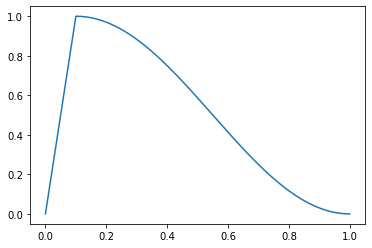

In [13]:
plt.plot(x,y)

In [14]:
y.sum()

499.49954958617684

In [15]:
x1, x2 = 5.5/17.5, 8.5/17.5

In [16]:
x1, x2

(0.3142857142857143, 0.4857142857142857)

In [19]:
np.sum(y[x<=x1]) / np.sum(y)

0.5083224137447816

In [20]:
np.sum(y[x<=x2]) / np.sum(y)

0.765342523365807